In [1]:
!pip install -q datasets

In [2]:
from datasets import load_dataset

In [3]:
emotions = load_dataset("dair-ai/emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
len(train_ds)

16000

In [7]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [11]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [12]:
import pandas as pd

In [13]:
emotions.set_format(type="pandas")

In [14]:
df=emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [16]:
df["label_name"] = df["label"].apply(label_int2str)

In [17]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [18]:
import matplotlib.pyplot as plt

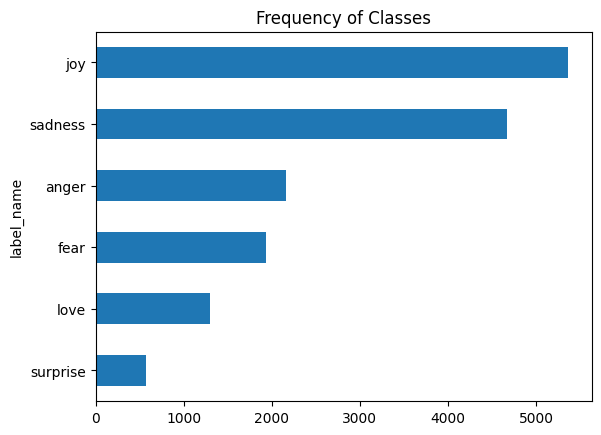

In [19]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

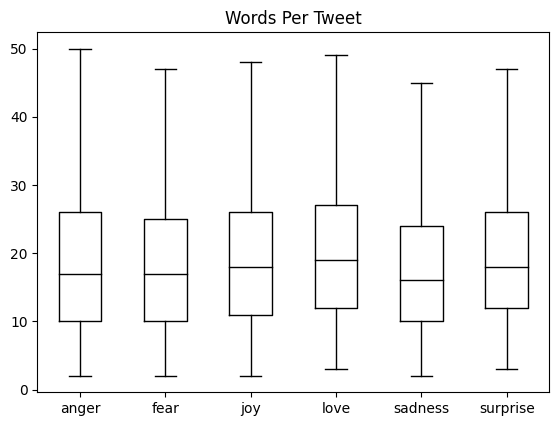

In [20]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid = False, showfliers = False,
          color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
emotions.reset_format()

In [22]:
text = "It is fun to work with NLP using HuggingFace."

In [23]:
tokenized_text = list(text)

In [24]:
print(tokenized_text)

['I', 't', ' ', 'i', 's', ' ', 'f', 'u', 'n', ' ', 't', 'o', ' ', 'w', 'o', 'r', 'k', ' ', 'w', 'i', 't', 'h', ' ', 'N', 'L', 'P', ' ', 'u', 's', 'i', 'n', 'g', ' ', 'H', 'u', 'g', 'g', 'i', 'n', 'g', 'F', 'a', 'c', 'e', '.']


In [25]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'F': 2, 'H': 3, 'I': 4, 'L': 5, 'N': 6, 'P': 7, 'a': 8, 'c': 9, 'e': 10, 'f': 11, 'g': 12, 'h': 13, 'i': 14, 'k': 15, 'n': 16, 'o': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'w': 22}


In [26]:
input_ids=[token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 20, 0, 14, 19, 0, 11, 21, 16, 0, 20, 17, 0, 22, 17, 18, 15, 0, 22, 14, 20, 13, 0, 6, 5, 7, 0, 21, 19, 14, 16, 12, 0, 3, 21, 12, 12, 14, 16, 12, 2, 8, 9, 10, 1]


In [27]:
df = pd.DataFrame({"name":["can", "efe","ada"],
                  "label":[0,1,2]})
df

,name,label
0,can,0
1,efe,1
2,ada,2


In [30]:
pd.get_dummies(df, dtype=int)

,label,name_ada,name_can,name_efe
0,0,0,1,0
1,1,0,0,1
2,2,1,0,0


In [31]:
import torch

In [32]:
input_ids = torch.tensor(input_ids)

In [33]:
import torch.nn.functional as F

In [34]:
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))

In [35]:
one_hot_encodings.shape

torch.Size([45, 23])

In [36]:
print(f"Token:{tokenized_text[0]}")

Token:I


In [38]:
print(f"Tensor index: {input_ids[0]}")

Tensor index: 4


In [39]:
print(f"One-hot: {one_hot_encodings[0]}")

One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [40]:
tokenized_text = text.split()
print(tokenized_text)

['It', 'is', 'fun', 'to', 'work', 'with', 'NLP', 'using', 'HuggingFace.']


In [41]:
from transformers import AutoTokenizer

In [42]:
model_ckpt = "distilbert-base-uncased"

In [43]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [44]:
from transformers import DistilBertTokenizer

In [45]:
distbert_tokenize=DistilBertTokenizer.from_pretrained(model_ckpt)

In [46]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2009, 2003, 4569, 2000, 2147, 2007, 17953, 2361, 2478, 17662, 12172, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [47]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'it', 'is', 'fun', 'to', 'work', 'with', 'nl', '##p', 'using', 'hugging', '##face', '.', '[SEP]']


In [48]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] it is fun to work with nlp using huggingface. [SEP]'

In [49]:
tokenizer.vocab_size

30522

In [50]:
tokenizer.model_max_length

512

In [57]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)

In [59]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [60]:
emotions_encoded = emotions.map(tokenize, batched=True,
                               batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [61]:
from transformers import DataCollatorWithPadding

In [62]:
data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

In [63]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']